<b> Avg number of words per sentence</b>: total num of words / total num of sents</br>

<b> Number of sentence by error type </b>: number of sentences containing at least 1 error of that type.

<b> Avg number of errors per sentence</b>: first, we compute the average number of errors per sentence. then, we sum all of the averages and divide by the total number of sentences: sum (total num of err per sent / total num or words per sent) / total num of sents</br>

<b> Avg number of basic error types per sentence</b>: first, we compute the total number of replaces, inserts, and deletes per sentence. then, we sum up all of those across all sentences and we divide each of them by the total number of sentences containing at least 1 error. This will give us the average % of inserts, deletes, and replaces per sentence.

<b>Avg number of areta error types per sentence </b>: first, we compute the total number of each replace type (P, O, M, S, etc.), each insert type (Pnx, noPnx), and delete for each sentence. Then we sum up all of those across all sentences and we divide each of them by the total number of sentences containing at least 1 basic error type. For examples, the average number of orthographical error is: (total number of orthographical errors across all sentences) / (total number of sentences containing at least 1 "replace" error)

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from collections import Counter, defaultdict
from utils import Dataset
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from camel_tools.utils.charsets import UNICODE_PUNCT_SYMBOL_CHARSET
import string
import re
import json

In [ ]:
def read_raw_lines(path):
    with open(path) as f:
        return [x.strip() for x in f.readlines()]

In [ ]:
qalb14_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                         f"qalb14_train.areta.txt")

In [ ]:
def get_datasets():
    qalb14_train = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2014/"\
                              f"train/QALB-2014-L1-Train.sent.no_ids.clean.dediac")
    qalb14_dev = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2014/"\
                                f"tune/QALB-2014-L1-Tune.sent.no_ids.clean.dediac")
    qalb14_test = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2014/"\
                                f"test/QALB-2014-L1-Test.sent.no_ids.clean.dediac")
    
    
    
    qalb15_train = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2015/"\
                                  f"train/QALB-2015-L2-Train.sent.no_ids.dediac")
    qalb15_dev = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2015/"\
                                  f"dev/QALB-2015-L2-Dev.sent.no_ids.dediac")
    qalb15_test = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2015/"\
                                  f"test/QALB-2015-L2-Test.sent.no_ids.dediac")
    qalb15_test_L1 = read_raw_lines(f"/scratch/ba63/gec/data/QALB-0.9.1-Dec03-2021-SharedTasks/data/2015/"\
                                  f"test/QALB-2015-L1-Test.sent.no_ids.dediac")
    
    

    zaebuc_train = read_raw_lines(f"/scratch/ba63/gec/data/ZAEBUC-v1.0/data/ar/"\
                                  "train/train.sent.cor.pnx.tok.dediac")
    zaebuc_dev = read_raw_lines(f"/scratch/ba63/gec/data/ZAEBUC-v1.0/data/ar/"\
                                "dev/dev.sent.cor.pnx.tok.dediac")
    zaebuc_test = read_raw_lines(f"/scratch/ba63/gec/data/ZAEBUC-v1.0/data/ar/"\
                                 "test/test.sent.cor.pnx.tok.dediac")
        
  
    qalb14_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/qalb14/qalb14_train.areta+.txt")
    
    
    qalb14_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/qalb14/qalb14_tune.areta+.txt")

    qalb15_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/qalb15/qalb15_train.areta+.txt")

    
    qalb15_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/qalb15/qalb15_dev.areta.txt")

    zaebuc_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/zaebuc/zaebuc_train.areta+.txt")

    
    zaebuc_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
                                             f"improved_alignment/zaebuc/zaebuc_dev.areta+.txt")
    
    
    
#     qalb14_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"qalb14_train.areta.txt")
    
    
#     qalb14_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"qalb14_tune.areta.txt")

#     qalb15_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"qalb15_train.areta.txt")

    
#     qalb15_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"qalb15_dev.areta.txt")

#     zaebuc_train_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"zaebuc_train.areta.txt")

    
#     zaebuc_dev_err = Dataset(raw_data_path=f"/scratch/ba63/gec/data/alignment/data_analysis_alignment/"\
#                                              f"zaebuc_dev.areta.txt")
    
    
    return {('qalb14', 'train'): {'raw': qalb14_train, 'error': qalb14_train_err},
            ('qalb14', 'dev'): {'raw': qalb14_dev, 'error': qalb14_dev_err},
            ('qalb14', 'test'): {'raw': qalb14_test, 'error': None},
            
            ('qalb15', 'train'): {'raw': qalb15_train, 'error': qalb15_train_err},
            ('qalb15', 'dev'): {'raw': qalb15_dev, 'error': qalb15_dev_err},
            ('qalb15', 'test'): {'raw': qalb15_test, 'error': None},
            ('qalb15', 'test_L1'): {'raw': qalb15_test_L1, 'error': None},
            
            ('zaebuc', 'train'): {'raw': zaebuc_train, 'error': zaebuc_train_err},
            ('zaebuc', 'dev'): {'raw': zaebuc_dev, 'error': zaebuc_dev_err},
            ('zaebuc', 'test'): {'raw': zaebuc_test, 'error': None}
           }

In [179]:
pnx = string.punctuation + ''.join(list(UNICODE_PUNCT_SYMBOL_CHARSET))
pnx_finder = re.compile(r'([' + re.escape(pnx) + '])')
def remove_pnx(string):
    string = re.sub(pnx_finder, r'', string)
    string = re.sub(' +', ' ', string)
    string = string.strip()
    return string

def get_pnx(string):
    pnx_tokens = pnx_finder.findall(string)
    return list(set(pnx_tokens))
    
def remove_pnx_errors(errors):
    no_pnx_errors = []
    for error in errors:
        if 'PM' in error or 'PT' in error or 'PC' in error:
            if '+' in error and len(error.split('+')) > 2:
                no_pnx_errors.append(error)
        else:
            no_pnx_errors.append(error)
    
    return no_pnx_errors

def avg_length(sents, drop_pnx=False):
    if drop_pnx:
        sents_ = [remove_pnx(sent) for sent in sents]
        return sum([len(x.split()) for x in sents_]) / len(sents)
    
    return sum([len(x.split()) for x in sents]) / len(sents)

In [180]:
def create_coocc_matrix(all_errors_cnts, sent_errors_cnts):
    all_errors = sorted(list(all_errors_cnts.keys()))
    errors2idx = {err:i for i, err in enumerate(all_errors)}
    idx2errors = {i:err for i, err in enumerate(all_errors)}

    coocc_matrix = {err: [0] * len(errors2idx) for err in errors2idx}    
    
    for count in sent_errors_cnts:
        cnts = [(tag, val) for tag, val in count.items()]
        for i in range(len(cnts)):
            for j in range(len(cnts)):
                coocc_matrix[cnts[i][0]][errors2idx[cnts[j][0]]] += cnts[j][1]
    
    

    top_5_coocc_matrix = {err: torch.topk(torch.tensor(coocc_matrix[err]), k=11)[1].numpy()
                          for err in coocc_matrix}
    
    
    top_5_coocc_matrix = {err: [idx2errors[idx] for idx in top_5_coocc_matrix[err] if idx2errors[idx] != err]
                         for err in top_5_coocc_matrix}
    
    return coocc_matrix, top_5_coocc_matrix

In [181]:
def count_sent_by_error_type(err_type_cnts):
    """Returns the number of sentences containing at least one error by type.
       i.e., number of sentences containing at least one replace, etc."""
    
    sent_cnt_basic_errs = {'replace': 0, 'insert': 0, 'delete': 0, 'unk': 0}

    sent_cnt_areta_errs = {'replace': {'P': 0, 'X': 0, 'SPLIT': 0, 'MERGE': 0,'O': 0,
                                         'M': 0, 'S': 0, 'Combs': 0},

                            'insert': {'Pnx': 0, 'noPnx': 0},
                           
                             'delete': {'Pnx': 0, 'noPnx': 0}

                            }

    for sent_err in err_type_cnts:
        basic = sent_err['basic']
        areta = sent_err['areta']
        
        for k, v in basic.items():
            sent_cnt_basic_errs[k] = sent_cnt_basic_errs[k] + (1 if v > 0 else 0)
        
        for k1, v1 in areta.items():
            for k2, v2 in v1.items():
                sent_cnt_areta_errs[k1][k2] = sent_cnt_areta_errs[k1][k2] + (1 if v2 > 0 else 0)
    
    return {'basic': sent_cnt_basic_errs,
            'areta': sent_cnt_areta_errs
           }
    
def count_error_types(errors):
    """
    Gets the number of errors types per sentence
    """
    error_types = {'replace': 0, 'insert': 0, 'delete': 0, 'unk': 0}
    error_types_areta = {'replace': {'P': 0, 'X': 0, 'SPLIT': 0, 'MERGE': 0,'O': 0,
                                     'M': 0, 'S': 0, 'Combs': 0},
                         
                        'insert': {'Pnx': 0, 'noPnx': 0},
                         
                         'delete': {'Pnx': 0, 'noPnx': 0}
                        
                        }
    
    
    for k, v in errors.items():

        if 'REPLACE' in k or 'SPLIT' in k or 'MERGE' in k:
            error_types['replace'] += v
            
        
            if '+' in k:
                error_types_areta['replace']['Combs'] += v
            
            elif 'SPLIT' == k or 'MERGE' == k:
                error_types_areta['replace'][k] += v
                
            else:
                areta_type = k.split('_')[1][0]
                error_types_areta['replace'][areta_type] += v
            

        if 'INSERT' in k:
            error_types['insert'] += v
            
            if k == 'INSERT_PM':
                error_types_areta['insert']['Pnx'] += v
            else:
                error_types_areta['insert']['noPnx'] += v
            
            
        if 'DELETE' in k:
            error_types['delete'] += v
            
            if k == 'DELETE_PM':
                error_types_areta['delete']['Pnx'] += v
            else:
                error_types_areta['delete']['noPnx'] += v

        if 'UNK' in k:
            error_types['unk'] += v
    
    
    # turning the counts into %
    if sum(error_types.values()) != 0:
        error_types = {k: v / sum(error_types.values()) for k, v in error_types.items()}
    
    # turning the counts into %
    if sum(error_types_areta['replace'].values()) != 0:
        error_types_areta['replace'] = {k: v / sum(error_types_areta['replace'].values())
                                        for k, v in error_types_areta['replace'].items()}
    
    if sum(error_types_areta['insert'].values()) != 0:
        error_types_areta['insert'] = {k: v / sum(error_types_areta['insert'].values())
                                        for k, v in error_types_areta['insert'].items()}
        
    if sum(error_types_areta['delete'].values()) != 0:
        error_types_areta['delete'] = {k: v / sum(error_types_areta['delete'].values())
                                        for k, v in error_types_areta['delete'].items()}
    
    
    
    return {'basic': error_types,
            'areta': error_types_areta
           }
        
        
def analyze_errors(raw_dataset, error_dataset, drop_pnx=True):
    correct_sents = []
    avg_num_errors = []
    errors_per_sent = []
    errors_types_per_sent = []
    words_per_sentence = []
    pnx = []
    cnt_replace_errs = 0 
    cnt_insert_errs = 0
    
    assert len(raw_dataset) == len(error_dataset)

    for i, example in enumerate(error_dataset.examples):
        src_tokens = example.src_tokens
        areta_tags = example.areta_tags
        raw_sent = raw_dataset[i]
        
        if drop_pnx == False:
            pnx += get_pnx(raw_sent)
    
        assert len(src_tokens) == len(areta_tags)
        

        uc_cts = areta_tags.count('UC')
        
        sent_errors = [tag for tag in areta_tags if tag != 'UC']
        words = raw_sent.split()

        if drop_pnx:
            sent_errors = remove_pnx_errors(sent_errors)
            words = remove_pnx(raw_sent).split()
        
        # number of words per sentence
        words_per_sentence.append(len(words))
        
        # per sentence error counts
        error_cts = Counter(sent_errors)
        errors_per_sent.append(error_cts)
        
        # per sentence error type (i.e., replace, delete, insert) count
        err_type_cnts = count_error_types(error_cts)
        errors_types_per_sent.append(err_type_cnts)
        
        # keeping track of sentences with 0 errors
        if len(sent_errors) == 0:
            correct_sents.append(i)
        
        # avg errors per sentence = num_errors / num_words
        avg_errors = len(sent_errors) / len(words)
        avg_num_errors.append(avg_errors)
    

    num_err_sents = len(raw_dataset) - len(correct_sents)
    num_err_sents_by_type = count_sent_by_error_type(errors_types_per_sent)

    
    # avg errors per sentence overall = sum(all_avg_sent_errors) / num_sents
    per_sent_avg_error = sum(avg_num_errors) / len(raw_dataset)
    avg_words_per_sent = sum(words_per_sentence) / len(raw_dataset)

    avg_err_types_per_sent = {'replace': 0, 'insert': 0, 'delete': 0, 'unk': 0}
    for k in avg_err_types_per_sent:
#         cnt_by_type = num_err_sents_by_type['basic'][k]
        avg_err_types_per_sent[k] = sum([x['basic'][k] for x in errors_types_per_sent]) / num_err_sents

    
    avg_err_types_per_sent_areta = {'replace': {'P': 0, 'X': 0, 'SPLIT': 0, 'MERGE': 0,'O': 0,
                                     'M': 0, 'S': 0, 'Combs': 0},
                                    'insert': {'Pnx': 0, 'noPnx': 0},
                                    'delete': {'Pnx': 0, 'noPnx': 0}
                                     }
    
    
    for k, v in avg_err_types_per_sent_areta.items():
        for k2 in v:
            cnt_by_type = num_err_sents_by_type['basic'][k]
            avg_err_types_per_sent_areta[k][k2] = sum([x['areta'][k][k2] for x in errors_types_per_sent]) / cnt_by_type
    
    fig, axarr = plt.subplots(2, 2, figsize=(13, 13))
    
    # # num errors vs # sentence
    plt.sca(axarr[0, 0])
    plt.hist([sum(x.values()) for x in errors_per_sent], bins=range(0, 90, 10))
    plt.xticks(range(0, 90, 10))
    plt.xlabel('# errors')
    plt.ylabel('# sentences')

    
    
    # % errors vs # sens histogram
    plt.sca(axarr[0, 1])
    plt.hist(avg_num_errors, bins=np.arange(0.0, 1.1, 0.1))
    plt.xticks(np.arange(0.0, 1.1, 0.1))
    plt.xlabel('% errors')
    plt.ylabel('# sentences')

    
    # # words vs # sentence histogram
    plt.sca(axarr[1, 0])
    plt.hist(words_per_sentence, bins=np.arange(20, 140, 10))
    plt.xticks(np.arange(20, 140, 10))
    plt.xlabel('# words')
    plt.ylabel('# sentences')

    
    
    # # errors vs # words
    plt.sca(axarr[1, 1])
    errors_by_length = defaultdict(list)
    for i, length in enumerate(words_per_sentence):
        errors_by_length[length].append((i, sum(errors_per_sent[i].values())))
    
    
    avg_errors_per_len = {k: sum(v[1] for v in vals) / (k * len(vals)) for k, vals in errors_by_length.items()}
    
    plt.bar(avg_errors_per_len.keys(), avg_errors_per_len.values())
    plt.xticks(np.arange(20, 400, 30))
    plt.xlabel('# words')
    plt.ylabel('% errors')
    plt.show()
    
    print(f"Avg words per sentence: {avg_words_per_sent:.0f}\n")
    print(f"Number of sentences without errors: {len(correct_sents)}\n")

    print(f"Number of sentences with errors: {num_err_sents}\n")
    
    print(f"Number of sentences by basic error types:")
    for k, v in num_err_sents_by_type['basic'].items():
        print(f'\t{k}: {v}')
    
    print()
    print(f"Number of sentences by areta error types:")
    for k, v in num_err_sents_by_type['areta'].items():
        print(f"\t{k}:")
        for k2, v2 in v.items():
            print(f'\t\t{k2}: {v2}')
    
    print()
    print(f"Avg number of errors per sentence: {per_sent_avg_error*100:.0f}%\n")
    
    print(f"Avg number of basic error types per sentence :")
    for k, v in avg_err_types_per_sent.items():
        print(f'\t{k}: {v*100:.0f}%')
    
    print()
    
    print(f"Avg number of areta error types per sentence :")
    for k, v in avg_err_types_per_sent_areta.items():
        print(f"\t{k}:")
        for k2, v2 in v.items():
            print(f'\t\t{k2}: {v2*100:.0f}%')

    print()
    if pnx:
        print(Counter(pnx))
#     errors_by_cnt = Counter(errors)
    
#     coocc_matrix, top_5_coocc_matrix = create_coocc_matrix(errors_by_cnt, errors_per_sent)
    
#     return errors_by_cnt, errors_per_sent, coocc_matrix, top_5_coocc_matrix

In [182]:
datasets = get_datasets()

With Punctuation Errors:




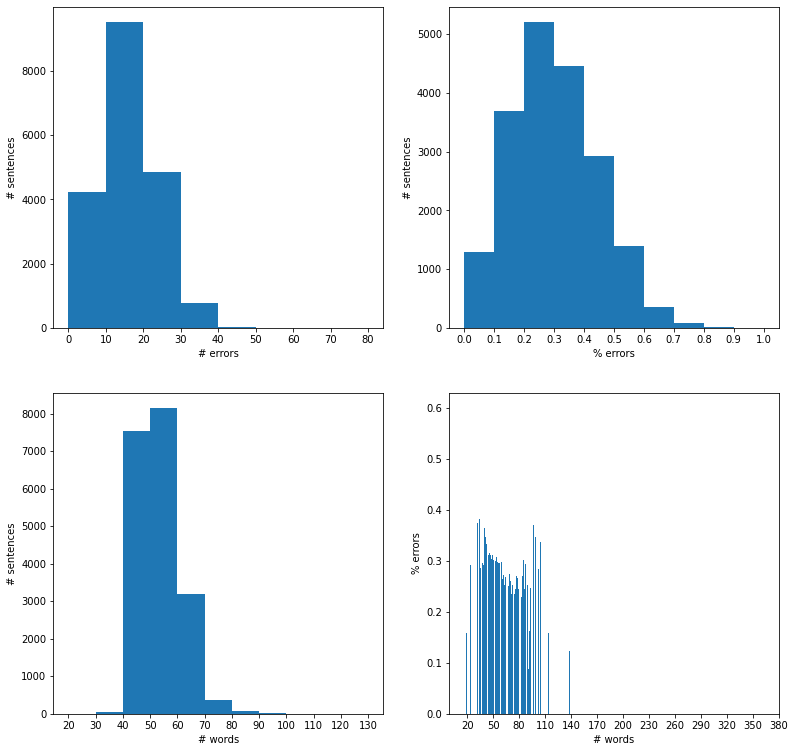

Avg words per sentence: 53

Number of sentences without errors: 44

Number of sentences with errors: 19367

Number of sentences by basic error types:
	replace: 19062
	insert: 18298
	delete: 2604
	unk: 1658

Number of sentences by areta error types:
	replace:
		P: 5568
		X: 7712
		SPLIT: 5038
		MERGE: 5454
		O: 17834
		M: 1282
		S: 3524
		Combs: 6919
	insert:
		Pnx: 18264
		noPnx: 887
	delete:
		Pnx: 2013
		noPnx: 726

Avg number of errors per sentence: 30%

Avg number of basic error types per sentence :
	replace: 63%
	insert: 34%
	delete: 2%
	unk: 1%

Avg number of areta error types per sentence :
	replace:
		P: 7%
		X: 7%
		SPLIT: 5%
		MERGE: 9%
		O: 64%
		M: 1%
		S: 2%
		Combs: 5%
	insert:
		Pnx: 99%
		noPnx: 1%
	delete:
		Pnx: 75%
		noPnx: 25%

Counter({'.': 11582, ',': 2349, ')': 2218, '(': 2214, '،': 1876, '!': 1647, '؟': 1244, ':': 886, '-': 439, '"': 364, '%': 203, '*': 144, '/': 137, '?': 73, '؛': 46, '_': 38, '}': 37, '{': 37, '=': 34, '[': 32, ']': 30, ';': 22, '\\': 18, '&':

In [183]:
# TODO: FIX SENT COUNTS BY ERRS
dataset = datasets[('qalb14', 'train')]

print(f'With Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)


Without Punctuation Errors:




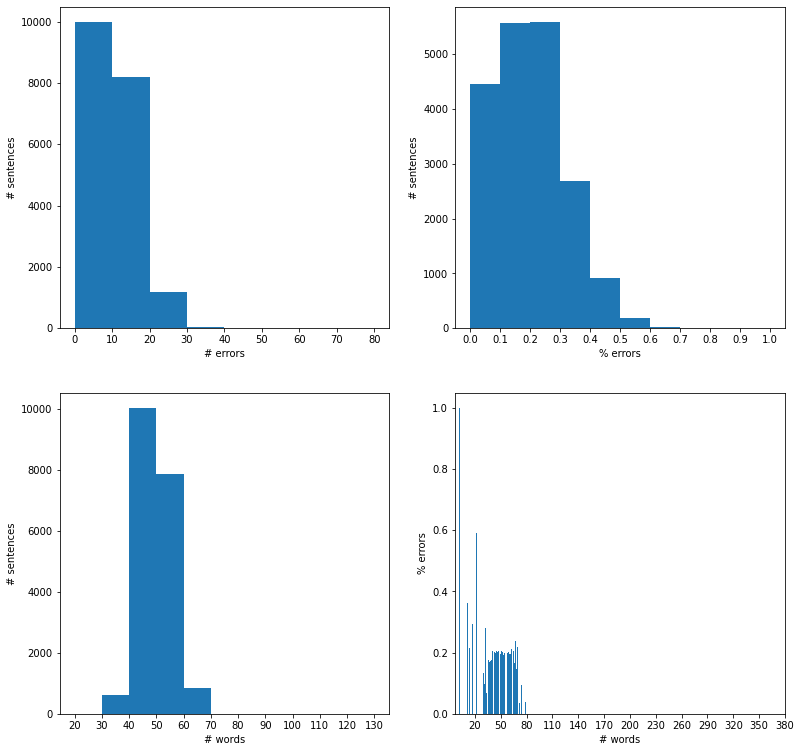

Avg words per sentence: 49

Number of sentences without errors: 498

Number of sentences with errors: 18913

Number of sentences by basic error types:
	replace: 18897
	insert: 887
	delete: 726
	unk: 1658

Number of sentences by areta error types:
	replace:
		P: 0
		X: 7712
		SPLIT: 5038
		MERGE: 5454
		O: 17834
		M: 1282
		S: 3524
		Combs: 6336
	insert:
		Pnx: 0
		noPnx: 887
	delete:
		Pnx: 0
		noPnx: 726

Avg number of errors per sentence: 20%

Avg number of basic error types per sentence :
	replace: 98%
	insert: 1%
	delete: 0%
	unk: 1%

Avg number of areta error types per sentence :
	replace:
		P: 0%
		X: 8%
		SPLIT: 5%
		MERGE: 10%
		O: 69%
		M: 1%
		S: 2%
		Combs: 5%
	insert:
		Pnx: 0%
		noPnx: 100%
	delete:
		Pnx: 0%
		noPnx: 100%



In [184]:
print(f'Without Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

In [185]:
# dataset = datasets[('qalb14', 'dev')]
# print(f'With Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)


In [186]:
# print(f'Without Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

With Punctuation Errors:




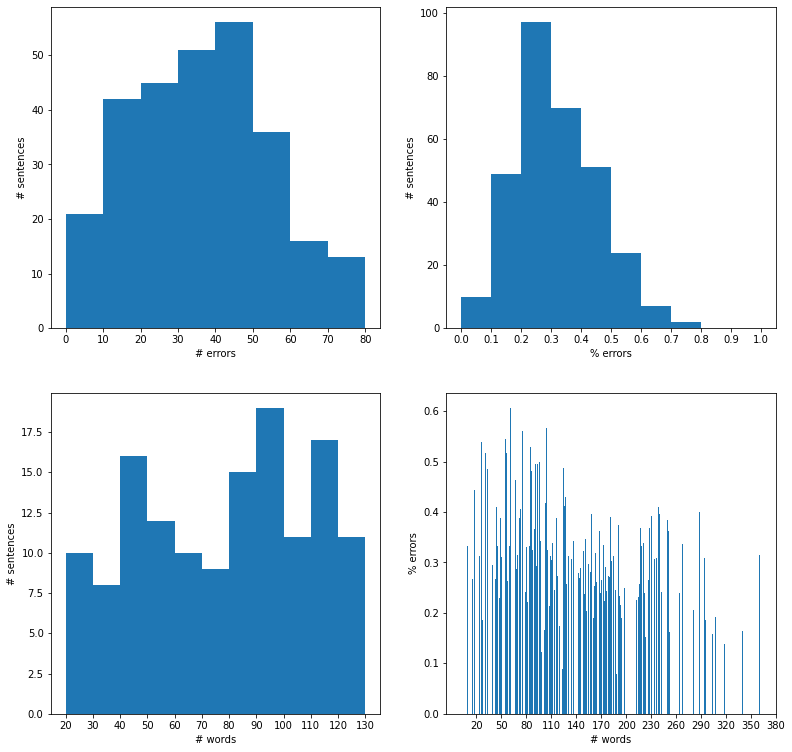

Avg words per sentence: 140

Number of sentences without errors: 4

Number of sentences with errors: 306

Number of sentences by basic error types:
	replace: 305
	insert: 298
	delete: 190
	unk: 139

Number of sentences by areta error types:
	replace:
		P: 219
		X: 288
		SPLIT: 43
		MERGE: 92
		O: 296
		M: 210
		S: 263
		Combs: 252
	insert:
		Pnx: 292
		noPnx: 214
	delete:
		Pnx: 92
		noPnx: 154

Avg number of errors per sentence: 32%

Avg number of basic error types per sentence :
	replace: 66%
	insert: 28%
	delete: 4%
	unk: 2%

Avg number of areta error types per sentence :
	replace:
		P: 11%
		X: 23%
		SPLIT: 1%
		MERGE: 4%
		O: 33%
		M: 7%
		S: 12%
		Combs: 9%
	insert:
		Pnx: 80%
		noPnx: 20%
	delete:
		Pnx: 33%
		noPnx: 67%

Counter({'.': 290, '،': 201, ':': 92, '"': 60, '(': 48, ')': 46, ',': 37, '؟': 34, '-': 26, '؛': 17, '!': 11, '–': 11, '#': 6, '/': 4, '_': 4, ';': 4, '&': 3, '%': 2, '‘': 2, '*': 2, '—': 1})


In [187]:
dataset = datasets[('qalb15', 'train')]
print(f'With Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)


Without Punctuation Errors:




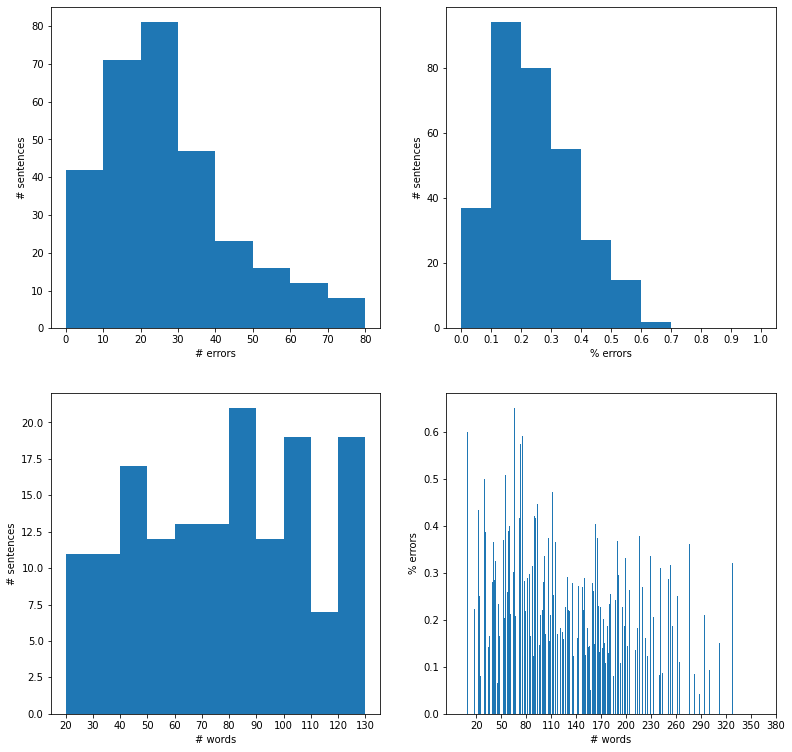

Avg words per sentence: 127

Number of sentences without errors: 6

Number of sentences with errors: 304

Number of sentences by basic error types:
	replace: 303
	insert: 214
	delete: 154
	unk: 139

Number of sentences by areta error types:
	replace:
		P: 0
		X: 288
		SPLIT: 43
		MERGE: 92
		O: 296
		M: 210
		S: 263
		Combs: 245
	insert:
		Pnx: 0
		noPnx: 214
	delete:
		Pnx: 0
		noPnx: 154

Avg number of errors per sentence: 25%

Avg number of basic error types per sentence :
	replace: 87%
	insert: 7%
	delete: 4%
	unk: 3%

Avg number of areta error types per sentence :
	replace:
		P: 0%
		X: 26%
		SPLIT: 1%
		MERGE: 5%
		O: 36%
		M: 8%
		S: 14%
		Combs: 10%
	insert:
		Pnx: 0%
		noPnx: 100%
	delete:
		Pnx: 0%
		noPnx: 100%



In [188]:
print(f'Without Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

In [189]:

# dataset = datasets[('qalb15', 'dev')]
# print(f'With Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)


In [190]:
# print(f'Without Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

With Punctuation Errors:




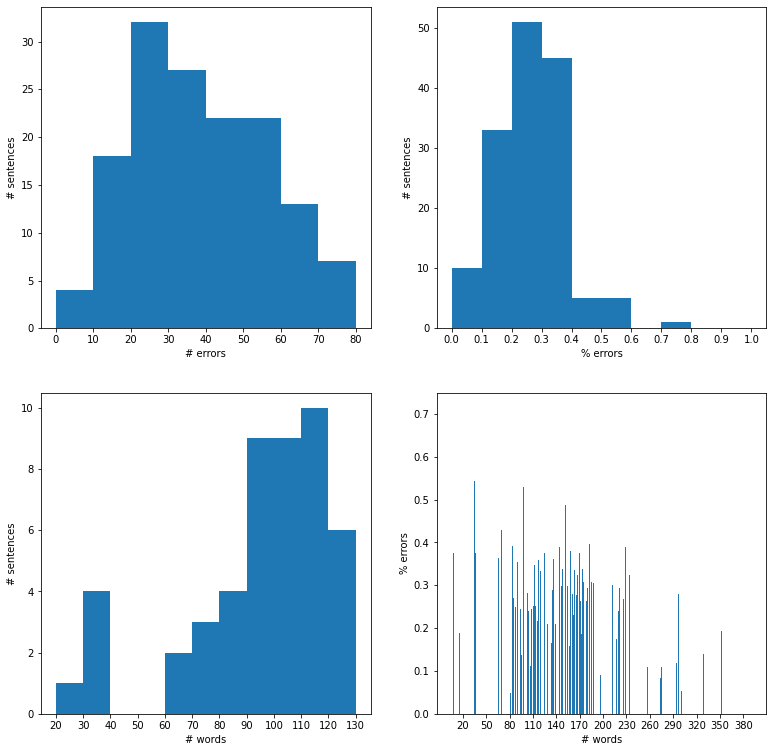

Avg words per sentence: 162

Number of sentences without errors: 0

Number of sentences with errors: 150

Number of sentences by basic error types:
	replace: 149
	insert: 126
	delete: 104
	unk: 60

Number of sentences by areta error types:
	replace:
		P: 93
		X: 125
		SPLIT: 35
		MERGE: 113
		O: 149
		M: 71
		S: 80
		Combs: 107
	insert:
		Pnx: 121
		noPnx: 36
	delete:
		Pnx: 73
		noPnx: 62

Avg number of errors per sentence: 27%

Avg number of basic error types per sentence :
	replace: 83%
	insert: 9%
	delete: 6%
	unk: 1%

Avg number of areta error types per sentence :
	replace:
		P: 6%
		X: 10%
		SPLIT: 1%
		MERGE: 17%
		O: 55%
		M: 3%
		S: 3%
		Combs: 6%
	insert:
		Pnx: 89%
		noPnx: 11%
	delete:
		Pnx: 57%
		noPnx: 43%

Counter({'.': 150, ',': 141, '-': 23, ':': 19, '?': 16, '"': 10, '(': 10, ')': 10, '[': 2, ']': 2, '%': 2, ';': 2, '@': 1, '{': 1, '!': 1})


In [191]:
dataset = datasets[('zaebuc', 'train')]
print(f'With Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)

Without Punctuation Errors:




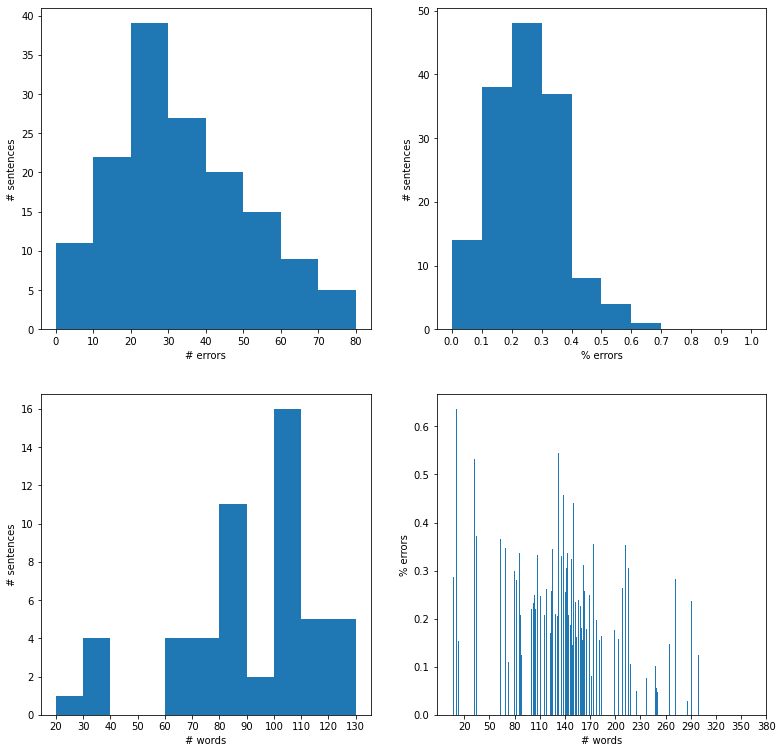

Avg words per sentence: 148

Number of sentences without errors: 1

Number of sentences with errors: 149

Number of sentences by basic error types:
	replace: 149
	insert: 36
	delete: 62
	unk: 60

Number of sentences by areta error types:
	replace:
		P: 0
		X: 125
		SPLIT: 35
		MERGE: 113
		O: 149
		M: 71
		S: 80
		Combs: 106
	insert:
		Pnx: 0
		noPnx: 36
	delete:
		Pnx: 0
		noPnx: 62

Avg number of errors per sentence: 25%

Avg number of basic error types per sentence :
	replace: 95%
	insert: 1%
	delete: 2%
	unk: 2%

Avg number of areta error types per sentence :
	replace:
		P: 0%
		X: 11%
		SPLIT: 1%
		MERGE: 18%
		O: 59%
		M: 3%
		S: 3%
		Combs: 5%
	insert:
		Pnx: 0%
		noPnx: 100%
	delete:
		Pnx: 0%
		noPnx: 100%



In [192]:
print(f'Without Punctuation Errors:\n\n')
analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

In [193]:
# print(f'Without Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=True)

In [ ]:
# dataset = datasets[('zaebuc', 'dev')]
# print(f'With Punctuation Errors:\n\n')
# analyze_errors(raw_dataset=dataset['raw'], error_dataset=dataset['error'], drop_pnx=False)